# Practical task 2

##### The assignment can be done in R or Python, or other software. Every group will have extra points according to the performance of the Decision Tree that they have built. To improve performance of classification feature engineering methods including correlation analysis, feature transformation, are advisable.

### Pre-processing

##### 1. Transform the categorical features into binary variables (dummy variables). Dummy variables are accepted by almost any classifier. (1 point)

In [32]:
# Importar os pacotes

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce # to mutate the data
from sklearn.model_selection import train_test_split # to split the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # to evaluate the accuracy
from sklearn import tree
from sklearn.metrics import confusion_matrix # to evaluate the confusion matrix
from sklearn.metrics import matthews_corrcoef # to evaluate the MCC

In [33]:
import os
os.getcwd()

'c:\\Users\\xx-re\\OneDrive\\Documentos\\GitHub\\DataScience-PUCRio-FB\\Task 2\\Python scripts'

In [34]:
# Ler a base de dados

data = pd.read_csv('../../Data/DS_salarios/ds_salaries.csv')
data
data = data.iloc[: , 1:len(data.columns)]
data.head()
data.drop(['work_month'], axis=1, inplace=True)

In [35]:
# Tamanho da base de dados

data.shape

(607, 11)

In [36]:
# Informações sobre a base de dados

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [37]:
# Quantidade de cada item na base de dados

for col in data.columns:
    
    print(data[col].value_counts())

2022    318
2021    217
2020     72
Name: work_year, dtype: int64
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analy

In [38]:
# Quantidade de cada item na classe

data['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [39]:
# Checar se há dados nulos

data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [40]:
# Dummies dos títulos de emprego

job_titles = pd.get_dummies(data["job_title"])
data = data.join(job_titles)
data.drop('job_title', inplace=True, axis=1)
data.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
0,2020,MI,FT,70000,EUR,79833,DE,0,DE,L,...,0,0,0,0,0,0,0,0,0,0
1,2020,SE,FT,260000,USD,260000,JP,0,JP,S,...,0,1,0,0,0,0,0,0,0,0
2,2020,SE,FT,85000,GBP,109024,GB,50,GB,M,...,0,0,0,0,0,0,0,0,0,0
3,2020,MI,FT,20000,USD,20000,HN,0,HN,S,...,0,0,0,0,0,0,0,1,0,0
4,2020,SE,FT,150000,USD,150000,US,50,US,L,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Dummies dos tipos de emprego

employment_types = pd.get_dummies(data["employment_type"])
data = data.join(employment_types)
data.drop('employment_type', inplace=True, axis=1)
data.head()

,work_year,experience_level,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,3D Computer Vision Researcher,...,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,CT,FL,FT,PT
0,2020,MI,70000,EUR,79833,DE,0,DE,L,0,...,0,0,0,0,0,0,0,0,1,0
1,2020,SE,260000,USD,260000,JP,0,JP,S,0,...,0,0,0,0,0,0,0,0,1,0
2,2020,SE,85000,GBP,109024,GB,50,GB,M,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,MI,20000,USD,20000,HN,0,HN,S,0,...,0,0,0,1,0,0,0,0,1,0
4,2020,SE,150000,USD,150000,US,50,US,L,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Dummies dos tipos de moeda

salary_currencys = pd.get_dummies(data["salary_currency"])
data = data.join(salary_currencys)
data.drop('salary_currency', inplace=True, axis=1)
data.head()

,work_year,experience_level,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,3D Computer Vision Researcher,AI Scientist,...,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
0,2020,MI,70000,79833,DE,0,DE,L,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020,SE,260000,260000,JP,0,JP,S,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,SE,85000,109024,GB,50,GB,M,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2020,MI,20000,20000,HN,0,HN,S,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,SE,150000,150000,US,50,US,L,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# Remoção da classe e das classes locais da companhia e da residência do empregado

X = data.drop(['company_size', 'company_location', 'employee_residence'], axis=1)

X.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,...,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
0,2020,MI,70000,79833,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020,SE,260000,260000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,SE,85000,109024,50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2020,MI,20000,20000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,SE,150000,150000,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Seleção da classe

y = data['company_size']

y.head()

0    L
1    S
2    M
3    S
4    L
Name: company_size, dtype: object

In [45]:
# Divisão em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [46]:
# Tamanho do treinamento e do teste

X_train.shape, X_test.shape

((406, 76), (201, 76))

In [47]:
X_train.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,...,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
124,2021,EN,8760,10354,50,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
434,2022,MI,80000,104702,100,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
472,2022,SE,220000,220000,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
185,2021,MI,4000,4000,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
228,2021,SE,135000,135000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Dummies dos anos, o nível de experiência e da taxa de trabalho remoto

encoder = ce.OrdinalEncoder(cols=['work_year', 'experience_level', 'remote_ratio'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [49]:
X_train.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,...,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
124,1,1,8760,10354,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
434,2,2,80000,104702,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
472,2,3,220000,220000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
185,1,2,4000,4000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
228,1,3,135000,135000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
X_test.head()

,work_year,experience_level,salary,salary_in_usd,remote_ratio,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,...,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
563,2,3,140250,140250,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
289,2,3,135000,135000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,1,2,100000,100000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78,1,2,270000,270000,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
182,1,2,22000,26005,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Processing

##### 2. Fit a Decision Tree to classify the size of company in which each data scientist work. This is represented by the feature ‘company_size’, which is the target variable. (3 points)

##### 2.1. Set the maximum depth of the tree to 3. (1 point)

In [51]:
# Definição do critério de divisão

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [52]:
# fit the model

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
# Predict with the model (using test)

y_pred_gini = clf_gini.predict(X_test)

In [54]:
# Predict with the model (using train)

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['L', 'M', 'M', 'S', 'L', 'M', 'L', 'L', 'S', 'M', 'M', 'M', 'M',
       'L', 'S', 'L', 'M', 'S', 'M', 'S', 'S', 'M', 'S', 'M', 'M', 'M',
       'M', 'M', 'L', 'M', 'L', 'M', 'L', 'M', 'M', 'S', 'M', 'M', 'M',
       'L', 'M', 'M', 'M', 'L', 'S', 'M', 'M', 'L', 'L', 'L', 'S', 'L',
       'L', 'M', 'S', 'L', 'M', 'L', 'L', 'M', 'L', 'M', 'M', 'L', 'M',
       'M', 'L', 'L', 'L', 'M', 'M', 'M', 'L', 'S', 'M', 'M', 'M', 'S',
       'L', 'M', 'M', 'S', 'M', 'M', 'M', 'M', 'M', 'S', 'S', 'M', 'L',
       'S', 'L', 'L', 'L', 'L', 'M', 'L', 'M', 'M', 'L', 'L', 'M', 'M',
       'M', 'L', 'M', 'S', 'M', 'L', 'M', 'L', 'L', 'M', 'M', 'M', 'M',
       'S', 'M', 'L', 'M', 'M', 'L', 'M', 'M', 'M', 'L', 'M', 'M', 'M',
       'M', 'L', 'M', 'L', 'S', 'L', 'M', 'M', 'L', 'L', 'M', 'M', 'L',
       'M', 'M', 'L', 'S', 'M', 'M', 'S', 'M', 'M', 'L', 'M', 'M', 'L',
       'M', 'M', 'S', 'M', 'M', 'M', 'M', 'L', 'M', 'S', 'S', 'L', 'M',
       'L', 'M', 'M', 'L', 'M', 'M', 'S', 'L', 'L', 'M', 'L', 'M

##### 2.2. Plot the decision tree. (2 point)

[Text(0.5, 0.875, 'work_year <= 1.5\ngini = 0.587\nsamples = 406\nvalue = [136, 216, 54]'),
 Text(0.25, 0.625, 'salary_in_usd <= 132513.0\ngini = 0.595\nsamples = 136\nvalue = [75, 32, 29]'),
 Text(0.125, 0.375, 'USD <= 0.5\ngini = 0.644\nsamples = 101\nvalue = [46, 28, 27]'),
 Text(0.0625, 0.125, 'gini = 0.585\nsamples = 62\nvalue = [35, 15, 12]'),
 Text(0.1875, 0.125, 'gini = 0.661\nsamples = 39\nvalue = [11, 13, 15]'),
 Text(0.375, 0.375, 'FT <= 0.5\ngini = 0.297\nsamples = 35\nvalue = [29, 4, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.258\nsamples = 34\nvalue = [29, 4, 1]'),
 Text(0.75, 0.625, 'work_year <= 2.5\ngini = 0.476\nsamples = 270\nvalue = [61, 184, 25]'),
 Text(0.625, 0.375, 'remote_ratio <= 1.5\ngini = 0.346\nsamples = 220\nvalue = [36, 174, 10]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.307\nsamples = 212\nvalue = [28, 174, 10]'),
 Text(0.875, 0.375, 

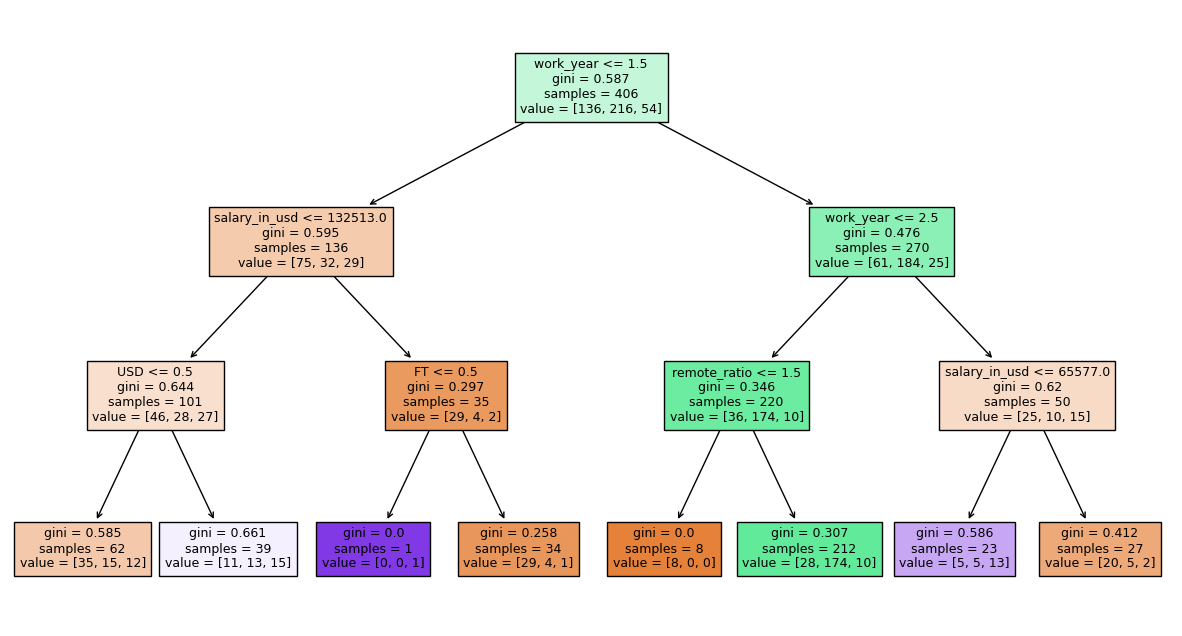

In [65]:
# Gráfico da árvore

plt.figure(figsize=(15,8))

tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True, fontsize=9,
              feature_names=X_train.columns.values)

##### 3. Interpret the results of the decision tree (3 points)

##### 3.1. Write a paragraph interpreting the structure of the decision tree.

###### write here!!!

## Post-processing

##### 4. Measure the performance of the decision tree to make accurate predictions.

##### 4.1. By hold-out cross-validation performance (3 points)

##### 4.1.1.Estimate the accuracy, interpret the results. (1.5 points)

In [56]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[37  9 16]
 [19 82  9]
 [16  3 10]]


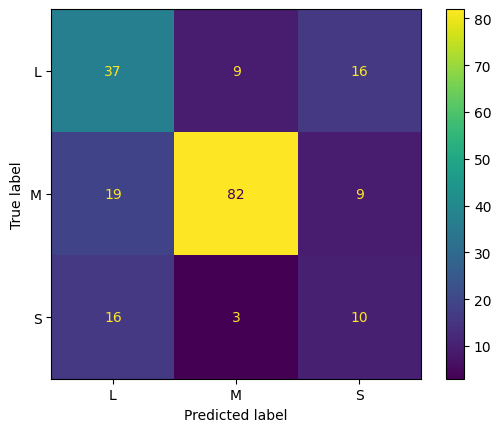

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_).plot()

In [58]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6418


In [59]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7266


In [60]:
# print the scores on training and test set

print('Training set ACC score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set ACC score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set ACC score: 0.7266
Test set ACC score: 0.6418


##### 4.1.2.Estimate the Matthews correlation coefficient, interpret the results (1.5 points)

In [61]:
# On test

matthews_corrcoef(y_test, y_pred_gini)

0.4147889636086372

In [62]:
# On training

matthews_corrcoef(y_train, y_pred_train_gini)

0.5396894969763637